# We will use this heart disease classification dataset to predict which patients are most likely to suffer from a heart disease in the near future.



## Data Dictionary
- **sex**: 1 = male 0 = female
- **cp**: *Chest-pain type:* 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic
- **trestbps**: *Resting Blood Pressure* in mmHg (unit). anything above 130-140 is typically cause for concern.
- **chol**: *Serum Cholestrol* in mg/dl (unit)
- **fbs**: *Fasting Blood Sugar*: If fasting blood sugar > 120mg/dl then : 1=true, 0=false.
- **restecg**: Resting ECG : 0 = normal, 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy
- **thalach**: *Max heart rate* achieved.
- **exang**: *Exercise induced angina* : 1 = yes 0 = no
- **oldpeak**: ST depression induced by exercise relative to rest: value - integer/float
- **slope**: 0 = upsloping, better heart-rate in excercise 1 = flat, minimal change, 2 = downsloping:signs unhealthy heart
- **ca**: Number of major vessels (0–3) colored by flourosopy - as integer or float.
- **thal** : *thalassemia* : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising
- **target** : whether the individual is suffering from heart disease or not : 1 = yes 0 = no

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_excel('heart disease classification dataset.xls')
df = df.rename(columns={'Unnamed: 0': 'id'})
df = df.set_index('id')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,,,,,,,,,,,,,,
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


### find and fill the empty cells with the average value of the current column

In [33]:
nulls = df.isnull().sum()
nulls[nulls>0]

trestbps    4
chol        1
thalach     5
dtype: int64

In [34]:
df['thalach'] = df.fillna(value =df['thalach'].mean())
df['chol'] = df.fillna(value = df['chol'].mean())
df['trestbps']= df.fillna(value = df['trestbps'].mean())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### We will find the columns contains objects values, we will want to change them to numeric values.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    object 
 4   chol      303 non-null    object 
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    object 
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(1), int64(8), object(5)
memory usage: 35.5+ KB


In [36]:
df['sex'].replace({'male': 1, 'female': 0},inplace = True)
df['target'].replace({'yes': 1, 'no': 0},inplace = True)

### Is there any difference between women and men?

In [37]:
sex_separate = df.groupby(["sex",'target']).size()
sex_separate

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

In [73]:
men = df[df['sex']==1]
women = df[df['sex']==0]
men_1 = men[men['target']==1]
women_1 = women[women['target']==1]
percent_men = round(men_1.shape[0]/men.shape[0]*100)
percent_women = round(women_1.shape[0]/women.shape[0]*100)
print ("we found out that {a}% of males and {b}% of females has heart disease".format(a=percent_men, b=percent_women))

we found out that 45% of males and 75% of females has heart disease


- the conclusion is that the data of genders present in the dataset are imbalanced

### The compare of Serum Cholestrol and Resting Blood Pressure

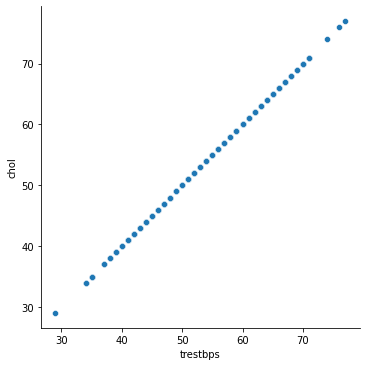

In [39]:
sns.relplot(x=df['trestbps'] ,y=df['chol'],  data=df)

### Divide to train/test dataset

In [40]:
x = df.drop (['target'], axis=1)
y = df['target']